# Classification Methods
**Using Classification Methods to predict essay grades using vectorized essays** 

In [1]:
%%capture
from essay2vec import *

In [2]:
%%capture
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn import grid_search
from sklearn.svm import SVC
from time import time
import warnings
warnings.filterwarnings("ignore")

First, we will look at traditional classification methods and compare the results. Utilizing **sklearn**'s GridSearch method, we will optimize each model's parameters. The **sklearn** models we will be using are:
- Logistic Regression
- K Nearest Neighbors
- Support Vector Machines 
- Random Forest

Since we foresee this algorithm being utilized on a larger scale, it is imperitive that we analyze the computation time when comparing classification methods. The **time** package will be used for this calculation.

In [3]:
#initialize arrays to store results
times = []
scores = []
labels = []

### Logistic Regression

While utilizing **sklearn**'s classification methods, many parameters are available to tune our models. To expedite this process, we will use the **GridSearchCV** method. This can be seen below:

In [4]:
#parameter combinations that will be tested
parameters = {'class_weight': ['balanced', None], 'penalty': ['l1','l2']}
logreg = LogisticRegression()
log_grid = grid_search.GridSearchCV(logreg, parameters)
log_grid.fit(trainDataVecs, y_train[:,0])
print (log_grid.best_params_)

{'class_weight': None, 'penalty': 'l1'}


Utilizing the calculated parameters, we will conduct our analysis.

In [5]:
start_lr = time()
logreg = LogisticRegression(penalty = 'l1', class_weight = None)
logreg.fit(trainDataVecs, y_train[:,0])
preds_lr  = logreg.predict(testDataVecs)
tot_lr = time() - start_lr

scores.append(spearmanr(y_test, preds_lr)[0])
times.append(tot_lr)
labels.append('Log Reg')

Utilizing the same approach above, we will tune the other three classification methods. 

In [6]:
#K Nearest Neighbors
start_knn = time()
knn = KNN(n_neighbors = 16)
knn.fit(trainDataVecs, y_train[:,0])
predsknn = knn.predict(testDataVecs)
tot_knn = time() - start_knn

scores.append(spearmanr(y_test, predsknn)[0])
times.append(tot_knn)
labels.append('KNN')

In [7]:
#Support Vector Machining
start = time()
svm = SVC(C = 50, gamma = 0.9)
svm.fit(trainDataVecs, y_train[:,0])
predictions = svm.predict(testDataVecs)
total = time() - start

scores.append(spearmanr(y_test, predictions)[0])
times.append(total)
labels.append('SVM')

In [8]:
#Random Forest
start_rf = time()
rf = RandomForest(n_estimators = 51, max_depth = 14)
rf.fit(trainDataVecs, y_train[:,0])
preds_rf = rf.predict(testDataVecs)
tot_rf = time() - start_rf 

scores.append(spearmanr(y_test, preds_rf)[0])
times.append(tot_rf)
labels.append('Random Forest')

### Comparison

We will look into how each classification method compares with taking Spearman's Correlation and Computation Time into account. 

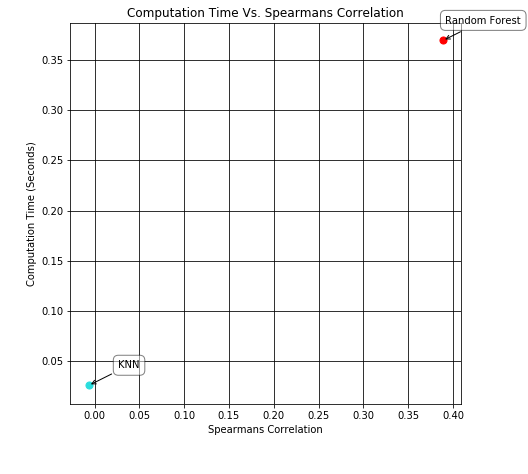

In [9]:
import matplotlib.cm as cm
#plot
fig = plt.figure(figsize=(7,7))

color=iter(cm.rainbow(np.linspace(0,1,4)))
for label, x, y, col  in zip(labels, scores, times, color):
    plt.scatter(x, y, color=col, s = 50)
    plt.grid(color='k')
    plt.annotate(
    label,
    xy = (x, y), xytext = (40, 20),
    textcoords = 'offset points', ha = 'center', va = 'center',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))  
plt.title('Computation Time Vs. Spearmans Correlation')
plt.ylabel('Computation Time (Seconds)')
plt.xlabel('Spearmans Correlation')
plt.show()

Looking at the graph above, we see that Random Forest hovers around 0.40 with KNN, and SVM being errous.